In [26]:
import pandas as pd
import timeit as tt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder
import scipy.stats

### Pandas

In [27]:
headers=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data_files = ['processed.cleveland.data','processed.hungarian.data','processed.switzerland.data','processed.va.data']
path_directory = './heart_disease/'

def load_data(headers,data_files,path_directory,sep):    
    dataframes = []
    res_df = pd.DataFrame(columns=headers)
    for i in data_files:
        file = path_directory+i
        if not os.path.isfile(file):
            print(f'{i} - file not exist')
            continue
        df = pd.read_csv(file, sep=sep, header=None)
        dataframes.append(df)

    if len(dataframes)==0:
        return
    res_df = pd.concat(dataframes, ignore_index=True)
    res_df.columns = headers
    return res_df

start_timer = tt.default_timer()
df = load_data(headers, data_files, path_directory,',')
df[df=='?'] = np.nan
print(tt.default_timer()-start_timer)
df

0.02405819995328784


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
918,58.0,1.0,4.0,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [28]:
start_timer = tt.default_timer()
print(df.isnull().sum())
print(tt.default_timer()-start_timer)

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
0.00263740005902946


1. Поборотися із зниклими даними.

In [29]:
#Cleaning data
def fill_data(df):
    df = df.fillna((df.isnull().sum()==True).astype('float64').mean()).reset_index(drop=True)
    return df

start_timer = tt.default_timer()    
df = fill_data(df)
print(tt.default_timer()-start_timer)

0.005965400021523237


In [30]:
start_timer = tt.default_timer()    
print(df.isnull().sum())
print(tt.default_timer()-start_timer)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
0.003251899965107441


In [31]:
float_columns = 'age,trestbps,chol,thalach,oldpeak,slope,ca,thal'
int_column = 'num'
categorical_columns = 'sex,cp,fbs,restecg,exang'
def one_type(df, columns, type_data):
    for i in columns:
        df[i] = df[i].astype(type_data)
    
start_timer = tt.default_timer()        
one_type(df,float_columns.split(','),'float64')
one_type(df,int_column.split(','),'int64')
one_type(df,categorical_columns.split(','),'int64')
one_type(df,categorical_columns.split(','),'object')
print(tt.default_timer()-start_timer)
df.head()

0.010153600014746189


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3.0,0.0,6.0,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2.0,3.0,3.0,2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2.0,2.0,7.0,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3.0,0.0,3.0,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1.0,0.0,3.0,0


2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [32]:
#Normalization and standartization
cols = (int_column+','+float_columns).split(',')
def normalization(df):
    norm_data = (df[cols]-df[cols].min())/(df[cols].max()-df[cols].min())
    return norm_data

def standarization(df):
    standart_data = (df[cols]-df[cols].mean())/df[cols].std()
    return standart_data

start_timer = tt.default_timer() 
norm_data = normalization(df)
standart_data = standarization(df)
print('Normalization data')
print(norm_data)
print('Standarization data')
print(standart_data)
print(tt.default_timer()-start_timer)

Normalization data
      num       age  trestbps      chol   thalach   oldpeak     slope  \
0    0.00  0.714286     0.725  0.386401  0.742574  0.556818  1.000000   
1    0.50  0.795918     0.800  0.474295  0.534653  0.465909  0.666667   
2    0.25  0.795918     0.600  0.379768  0.638614  0.590909  0.666667   
3    0.00  0.183673     0.650  0.414594  0.925743  0.693182  1.000000   
4    0.00  0.265306     0.650  0.338308  0.851485  0.454545  0.333333   
..    ...       ...       ...       ...       ...       ...       ...   
915  0.25  0.530612     0.635  0.552239  0.762376  0.295455  0.000000   
916  0.00  0.693878     0.000  0.230514  0.000000  0.295455  0.000000   
917  0.50  0.551020     0.610  0.369818  0.495050  0.295455  0.000000   
918  0.00  0.612245     0.000  0.638474  0.000000  0.295455  0.000000   
919  0.25  0.693878     0.600  0.421227  0.460396  0.295455  0.000000   

           ca      thal  
0    0.000000  0.857143  
1    1.000000  0.428571  
2    0.666667  1.000000  


In [33]:
print('Standarization data')
print(standart_data)

Standarization data
          num       age  trestbps      chol   thalach   oldpeak     slope  \
0   -0.871320  1.006838  0.572590  0.352331  0.502012  1.375125  1.866572   
1    0.878930  1.431255  0.975043  0.814971 -0.517687  0.632032  0.843183   
2    0.003805  1.431255 -0.098163  0.317415 -0.007838  1.653784  0.843183   
3   -0.871320 -1.751875  0.170138  0.500725  1.400318  2.489763  1.866572   
4   -0.871320 -1.327458  0.170138  0.099189  1.036140  0.539146 -0.180205   
..        ...       ...       ...       ...       ...       ...       ...   
915  0.003805  0.051899  0.089648  1.225236  0.599126 -0.761266 -1.203594   
916 -0.871320  0.900734 -3.317781 -0.468200 -3.139771 -0.761266 -1.203594   
917  0.878930  0.158003 -0.044503  0.265041 -0.711916 -0.761266 -1.203594   
918 -0.871320  0.476316 -3.317781  1.679147 -3.139771 -0.761266 -1.203594   
919  0.003805  0.900734 -0.098163  0.535641 -0.881866 -0.761266 -1.203594   

           ca      thal  
0   -0.361203  1.257759  
1  

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

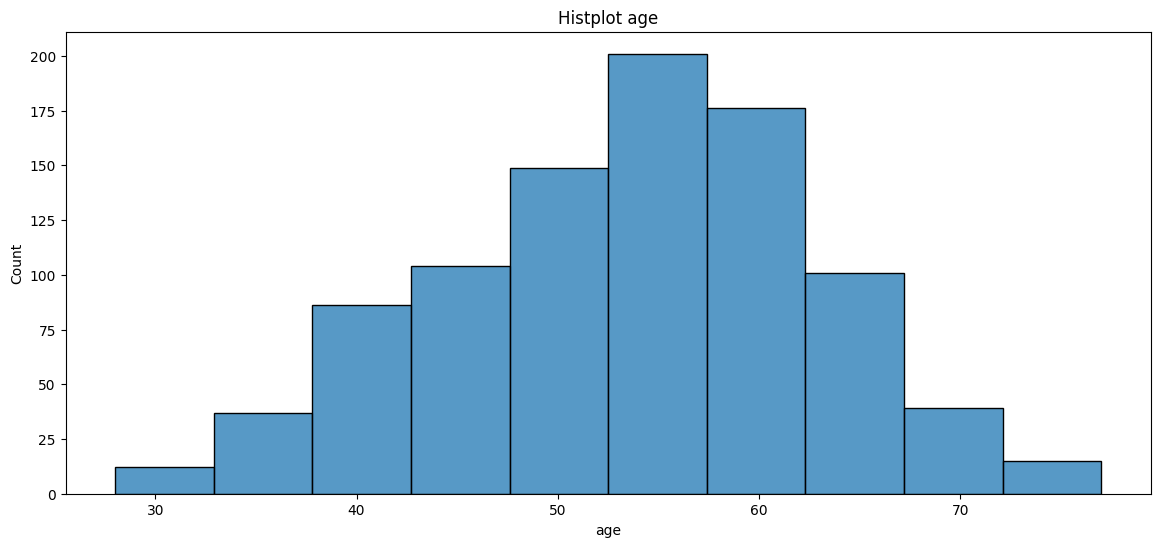

0.3261691000079736


In [34]:
def histogram(df, col, range_col):
    if len(range_col)!=2:
        return
    plt.figure(figsize=(14,6))
    data = df[df[col].between(np.min(range_col), np.max(range_col))][col]
    sns.histplot(data, bins=10)
    plt.title(f'Histplot {col}')
    plt.xlabel(col)
    plt.show()

start_timer = tt.default_timer() 
histogram(df, 'age', [2,120])
print(tt.default_timer()-start_timer)

4. Збудувати графік залежності одного integer/real атрибута від іншого.


<Figure size 1400x600 with 0 Axes>

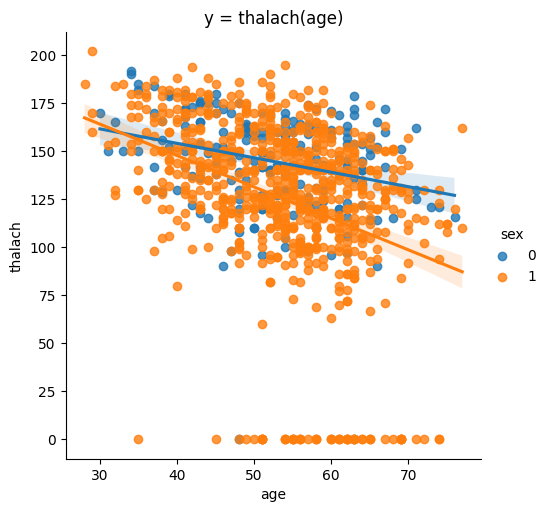

0.7664086999138817


In [35]:
start_timer = tt.default_timer() 
plt.figure(figsize=(14,6))
sns.lmplot(data = df, x = 'age', y = 'thalach', hue='sex')
plt.title('y = thalach(age)')
plt.xlabel('age')
plt.ylabel('thalach')
plt.show()
print(tt.default_timer()-start_timer)

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.


In [36]:
start_timer = tt.default_timer() 
pearson = scipy.stats.pearsonr(x = df['age'], y = df['thalach'])
spirman = scipy.stats.spearmanr(a = df['age'], b = df['thalach'])
print(tt.default_timer()-start_timer)
print('Pearson coefficient:',pearson.statistic)
print('Spirman coefficient:',spirman.statistic)

0.004522499977611005
Pearson coefficient: -0.34100063731036456
Spirman coefficient: -0.37025778288777067


6. Провести One Hot Encoding категоріального string атрибуту.

In [37]:
start_timer = tt.default_timer() 
df['sex'].replace({0:'female',1:'male'},inplace=True)
enc = OneHotEncoder(sparse_output=False)
sex = df[['sex','age']]
x = sex.select_dtypes(include='object')
sex_enc = enc.fit_transform(x)
df['sex'] = sex_enc[:,1]
print(tt.default_timer()-start_timer)
df.head()

0.008985999971628189


C:\Users\student05\AppData\Local\Temp\ipykernel_2524\98508276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({0:'female',1:'male'},inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1,145.0,233.0,1,2,150.0,0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4,160.0,286.0,0,2,108.0,1,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4,120.0,229.0,0,2,129.0,1,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3,130.0,250.0,0,0,187.0,0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2,130.0,204.0,0,2,172.0,0,1.4,1.0,0.0,3.0,0


7. Провести візуалізацію багатовимірних даних

21.412667999975383


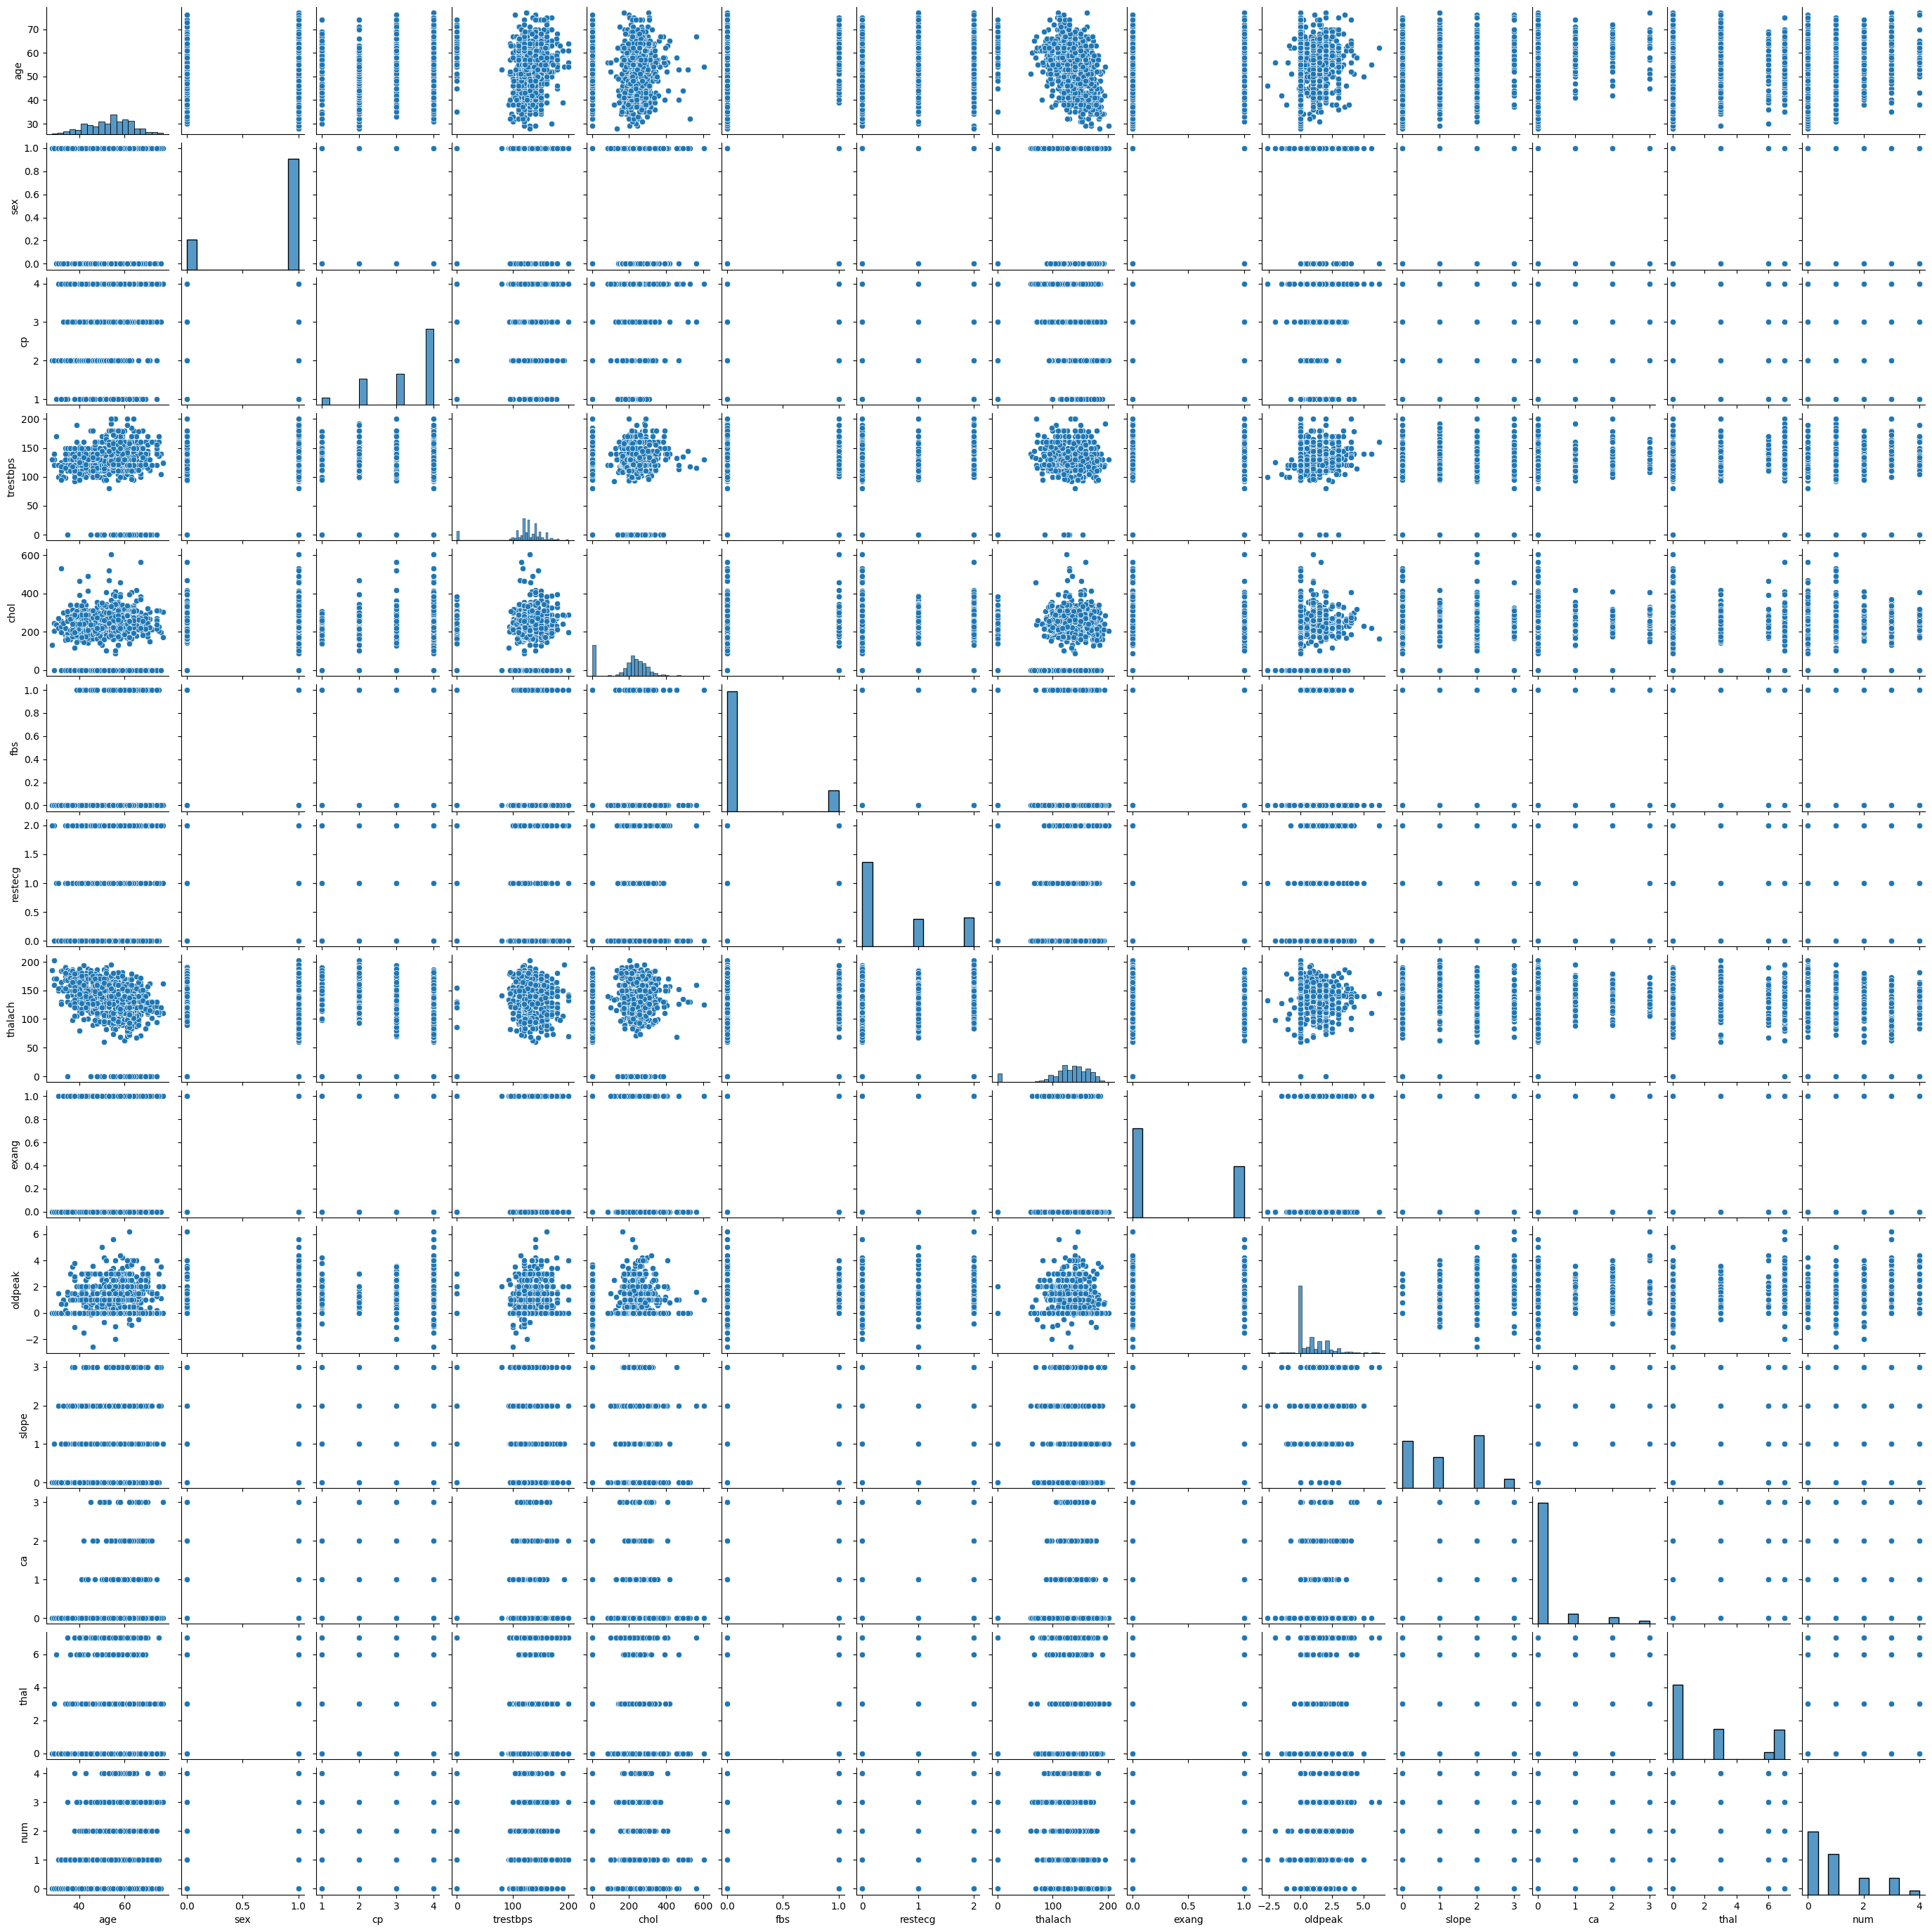

In [38]:
start_timer = tt.default_timer() 
sns.pairplot(df, height=2)
print(tt.default_timer()-start_timer)

### Numpy

In [39]:
data_files = ['processed.cleveland.data','processed.hungarian.data','processed.switzerland.data','processed.va.data']
path_directory = './heart_disease/'

def np_load_data(path,files, sep):
    np_arrs = []
    for i in files:
        fl = path+i
        nump_matrix = np.loadtxt(fl,delimiter=sep, dtype=str)
        np_arrs.append(nump_matrix)

    np_arr = np.concatenate(np_arrs)
    return np_arr
start_timer = tt.default_timer() 
np_arr = np_load_data(path_directory,data_files ,',')
print(tt.default_timer()-start_timer)
np_arr

0.007619500043801963


array([['63.0', '1.0', '1.0', ..., '0.0', '6.0', '0'],
       ['67.0', '1.0', '4.0', ..., '3.0', '3.0', '2'],
       ['67.0', '1.0', '4.0', ..., '2.0', '7.0', '1'],
       ...,
       ['55', '1', '4', ..., '?', '6', '2'],
       ['58', '1', '4', ..., '?', '?', '0'],
       ['62', '1', '2', ..., '?', '?', '1']], dtype='<U5')

1. Поборотися із зниклими даними.


In [40]:
start_timer = tt.default_timer() 
print(np_arr[np_arr=='?'])
print(tt.default_timer()-start_timer)

['?' '?' '?' ... '?' '?' '?']
0.0009519999148324132


In [41]:
def fill_mean(nd_array):
    num_cols = nd_array.shape[1]
    for i in range(num_cols):
        if not np.where(nd_array[:,i]=='?'):
            continue
        notna_e = nd_array[:,i][nd_array[:,i]!='?']
        nd_array[:,i][nd_array[:,i]=='?'] = notna_e.astype('float').mean()
        
    return nd_array

start_timer = tt.default_timer() 
fill_mean(np_arr)
print(np_arr[np_arr=='?'])
print(tt.default_timer()-start_timer)

[]
0.011031500063836575


In [42]:
np_arr = np_arr.astype('float')

2. Пронормувати вибраний датасет або стандартизувати його (нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).


In [50]:
# norm_data = (data-min(data))/(max(data)-min(data))
# standart_data = (data – mean(data))/std(data)

def normalization(np_arr,ex_i):
    norm_data = np.copy(np_arr)
    for i in range(np_arr.shape[1]):
        if i in ex_i:
            continue
        norm_data[:,i] = (np_arr[:,i]-np.min(np_arr[:,i]))/(np.max(np_arr[:,i])-np.min(np_arr[:,i]))
    return norm_data


def standarization(np_arr,ex_i):
    standrat_data = np.copy(np_arr)
    for i in range(np_arr.shape[1]):
        if i in ex_i:
            continue
        standrat_data[:,i] = (np_arr[:,i]-np.mean(np_arr[:,i]))/np.std(np_arr[:,i])
    return standrat_data


start_timer = tt.default_timer() 
norm_data = normalization(np_arr,[1])
standart_data = standarization(np_arr,[1])
print(tt.default_timer()-start_timer)
print('Normalization data:')
print(norm_data)
print('Standartization data:')
print(standart_data)


0.002339300001040101
Normalization data:
[[0.71428571 1.         0.         ... 0.         0.75       0.        ]
 [0.79591837 1.         1.         ... 1.         0.         0.5       ]
 [0.79591837 1.         1.         ... 0.66666667 1.         0.25      ]
 ...
 [0.55102041 1.         1.         ... 0.22533333 0.75       0.5       ]
 [0.6122449  1.         1.         ... 0.22533333 0.52175    0.        ]
 [0.69387755 1.         0.33333333 ... 0.22533333 0.52175    0.25      ]]
Standartization data:
[[ 1.00738556e+00  1.00000000e+00 -2.41815170e+00 ... -1.24891075e+00
   6.93272135e-01 -8.71794418e-01]
 [ 1.43203377e+00  1.00000000e+00  8.06050565e-01 ...  4.29255900e+00
  -1.58538700e+00  8.79408343e-01]
 [ 1.43203377e+00  1.00000000e+00  8.06050565e-01 ...  2.44540241e+00
   1.45282518e+00  3.80696252e-03]
 ...
 [ 1.58089143e-01  1.00000000e+00  8.06050565e-01 ... -2.32902352e-04
   6.93272135e-01  8.79408343e-01]
 [ 4.76575299e-01  1.00000000e+00  8.06050565e-01 ... -2.32902352e-0

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.


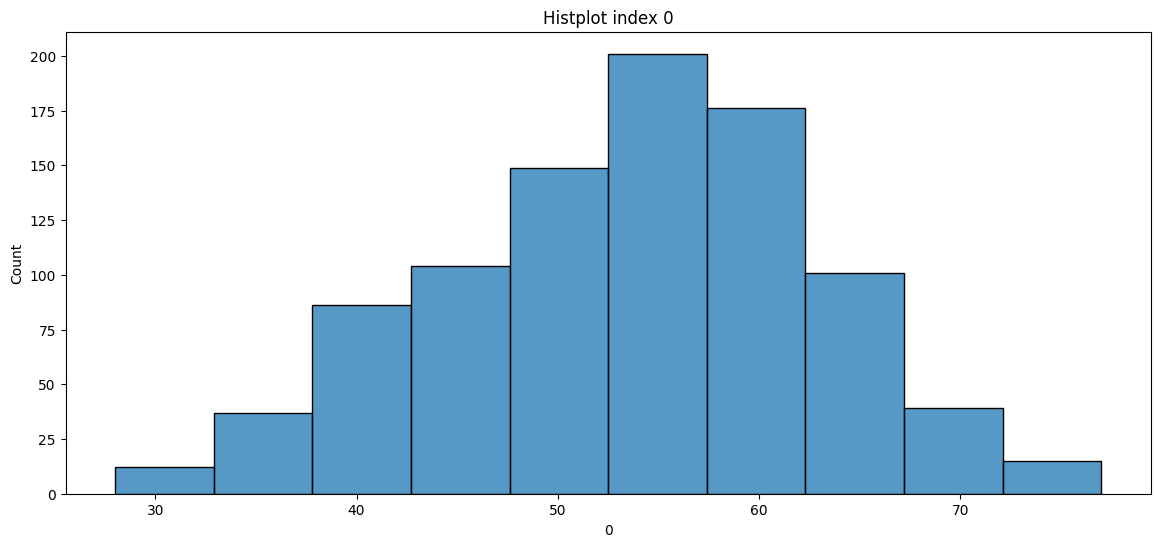

0.2735910000046715


In [51]:
def histogram(np_arr, index, range_col):
    if len(range_col)!=2:
        return
    plt.figure(figsize=(14,6))
    col = np_arr[:,index]
    data = col[np.logical_and(col>np.min(range_col),col<np.max(range_col))]
    sns.histplot(data, bins=10)
    plt.title(f'Histplot index {index}')
    plt.xlabel(index)
    plt.show()

start_timer = tt.default_timer() 
histogram(np_arr, 0, [2,120])
print(tt.default_timer()-start_timer)

4. Збудувати графік залежності одного integer/real атрибута від іншого.


0.18158869992475957


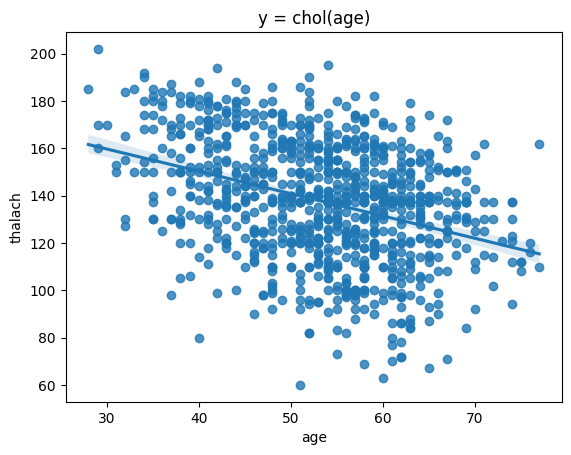

<Figure size 1400x600 with 0 Axes>

In [52]:
start_timer = tt.default_timer() 
plt.title('y = chol(age)')
sns.regplot(x = np_arr[:,0], y = np_arr[:,7])
plt.xlabel('age')
plt.ylabel('thalach')
plt.figure(figsize=(14,6))
print(tt.default_timer()-start_timer)

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.


In [53]:
start_timer = tt.default_timer() 
pearson = scipy.stats.pearsonr(x = np_arr[:,0].astype('float'), y = np_arr[:,7].astype('float'))
spearman = scipy.stats.spearmanr(a = np_arr[:,0].astype('float'), b = np_arr[:,7].astype('float'))
print(tt.default_timer()-start_timer)
print('Pearson:',pearson.statistic)
print('Spearman:',spearman.statistic)

0.005099299945868552
Pearson: -0.3535391418644918
Spearman: -0.3348630570640966


6. Провести One Hot Encoding категоріального string атрибуту.


In [54]:
np_hot_enc = np.copy(np_arr)
np_hot_enc = np_hot_enc.astype('object')
start_timer = tt.default_timer() 
np_hot_enc[:,1][np_hot_enc[:,1]==1.0] = 'Male'
np_hot_enc[:,1][np_hot_enc[:,1]==0.0] = 'Female'
print(tt.default_timer()-start_timer)
np_hot_enc

0.0007065000245347619


array([[63.0, 'Male', 1.0, ..., 0.0, 6.0, 0.0],
       [67.0, 'Male', 4.0, ..., 3.0, 3.0, 2.0],
       [67.0, 'Male', 4.0, ..., 2.0, 7.0, 1.0],
       ...,
       [55.0, 'Male', 4.0, ..., 0.676, 6.0, 2.0],
       [58.0, 'Male', 4.0, ..., 0.676, 5.087, 0.0],
       [62.0, 'Male', 2.0, ..., 0.676, 5.087, 1.0]], dtype=object)

In [55]:
start_timer = tt.default_timer() 
un = np_hot_enc[:,1]
sex = un[:,np.newaxis]
enc = OneHotEncoder(sparse_output=False)
x = enc.fit_transform(sex)
np_hot_enc[:,1]=x[:,1]
print(tt.default_timer()-start_timer)
np_hot_enc

0.003250699955970049


array([[63.0, 1.0, 1.0, ..., 0.0, 6.0, 0.0],
       [67.0, 1.0, 4.0, ..., 3.0, 3.0, 2.0],
       [67.0, 1.0, 4.0, ..., 2.0, 7.0, 1.0],
       ...,
       [55.0, 1.0, 4.0, ..., 0.676, 6.0, 2.0],
       [58.0, 1.0, 4.0, ..., 0.676, 5.087, 0.0],
       [62.0, 1.0, 2.0, ..., 0.676, 5.087, 1.0]], dtype=object)

7. Провести візуалізацію багатовимірних даних.

22.554379099979997


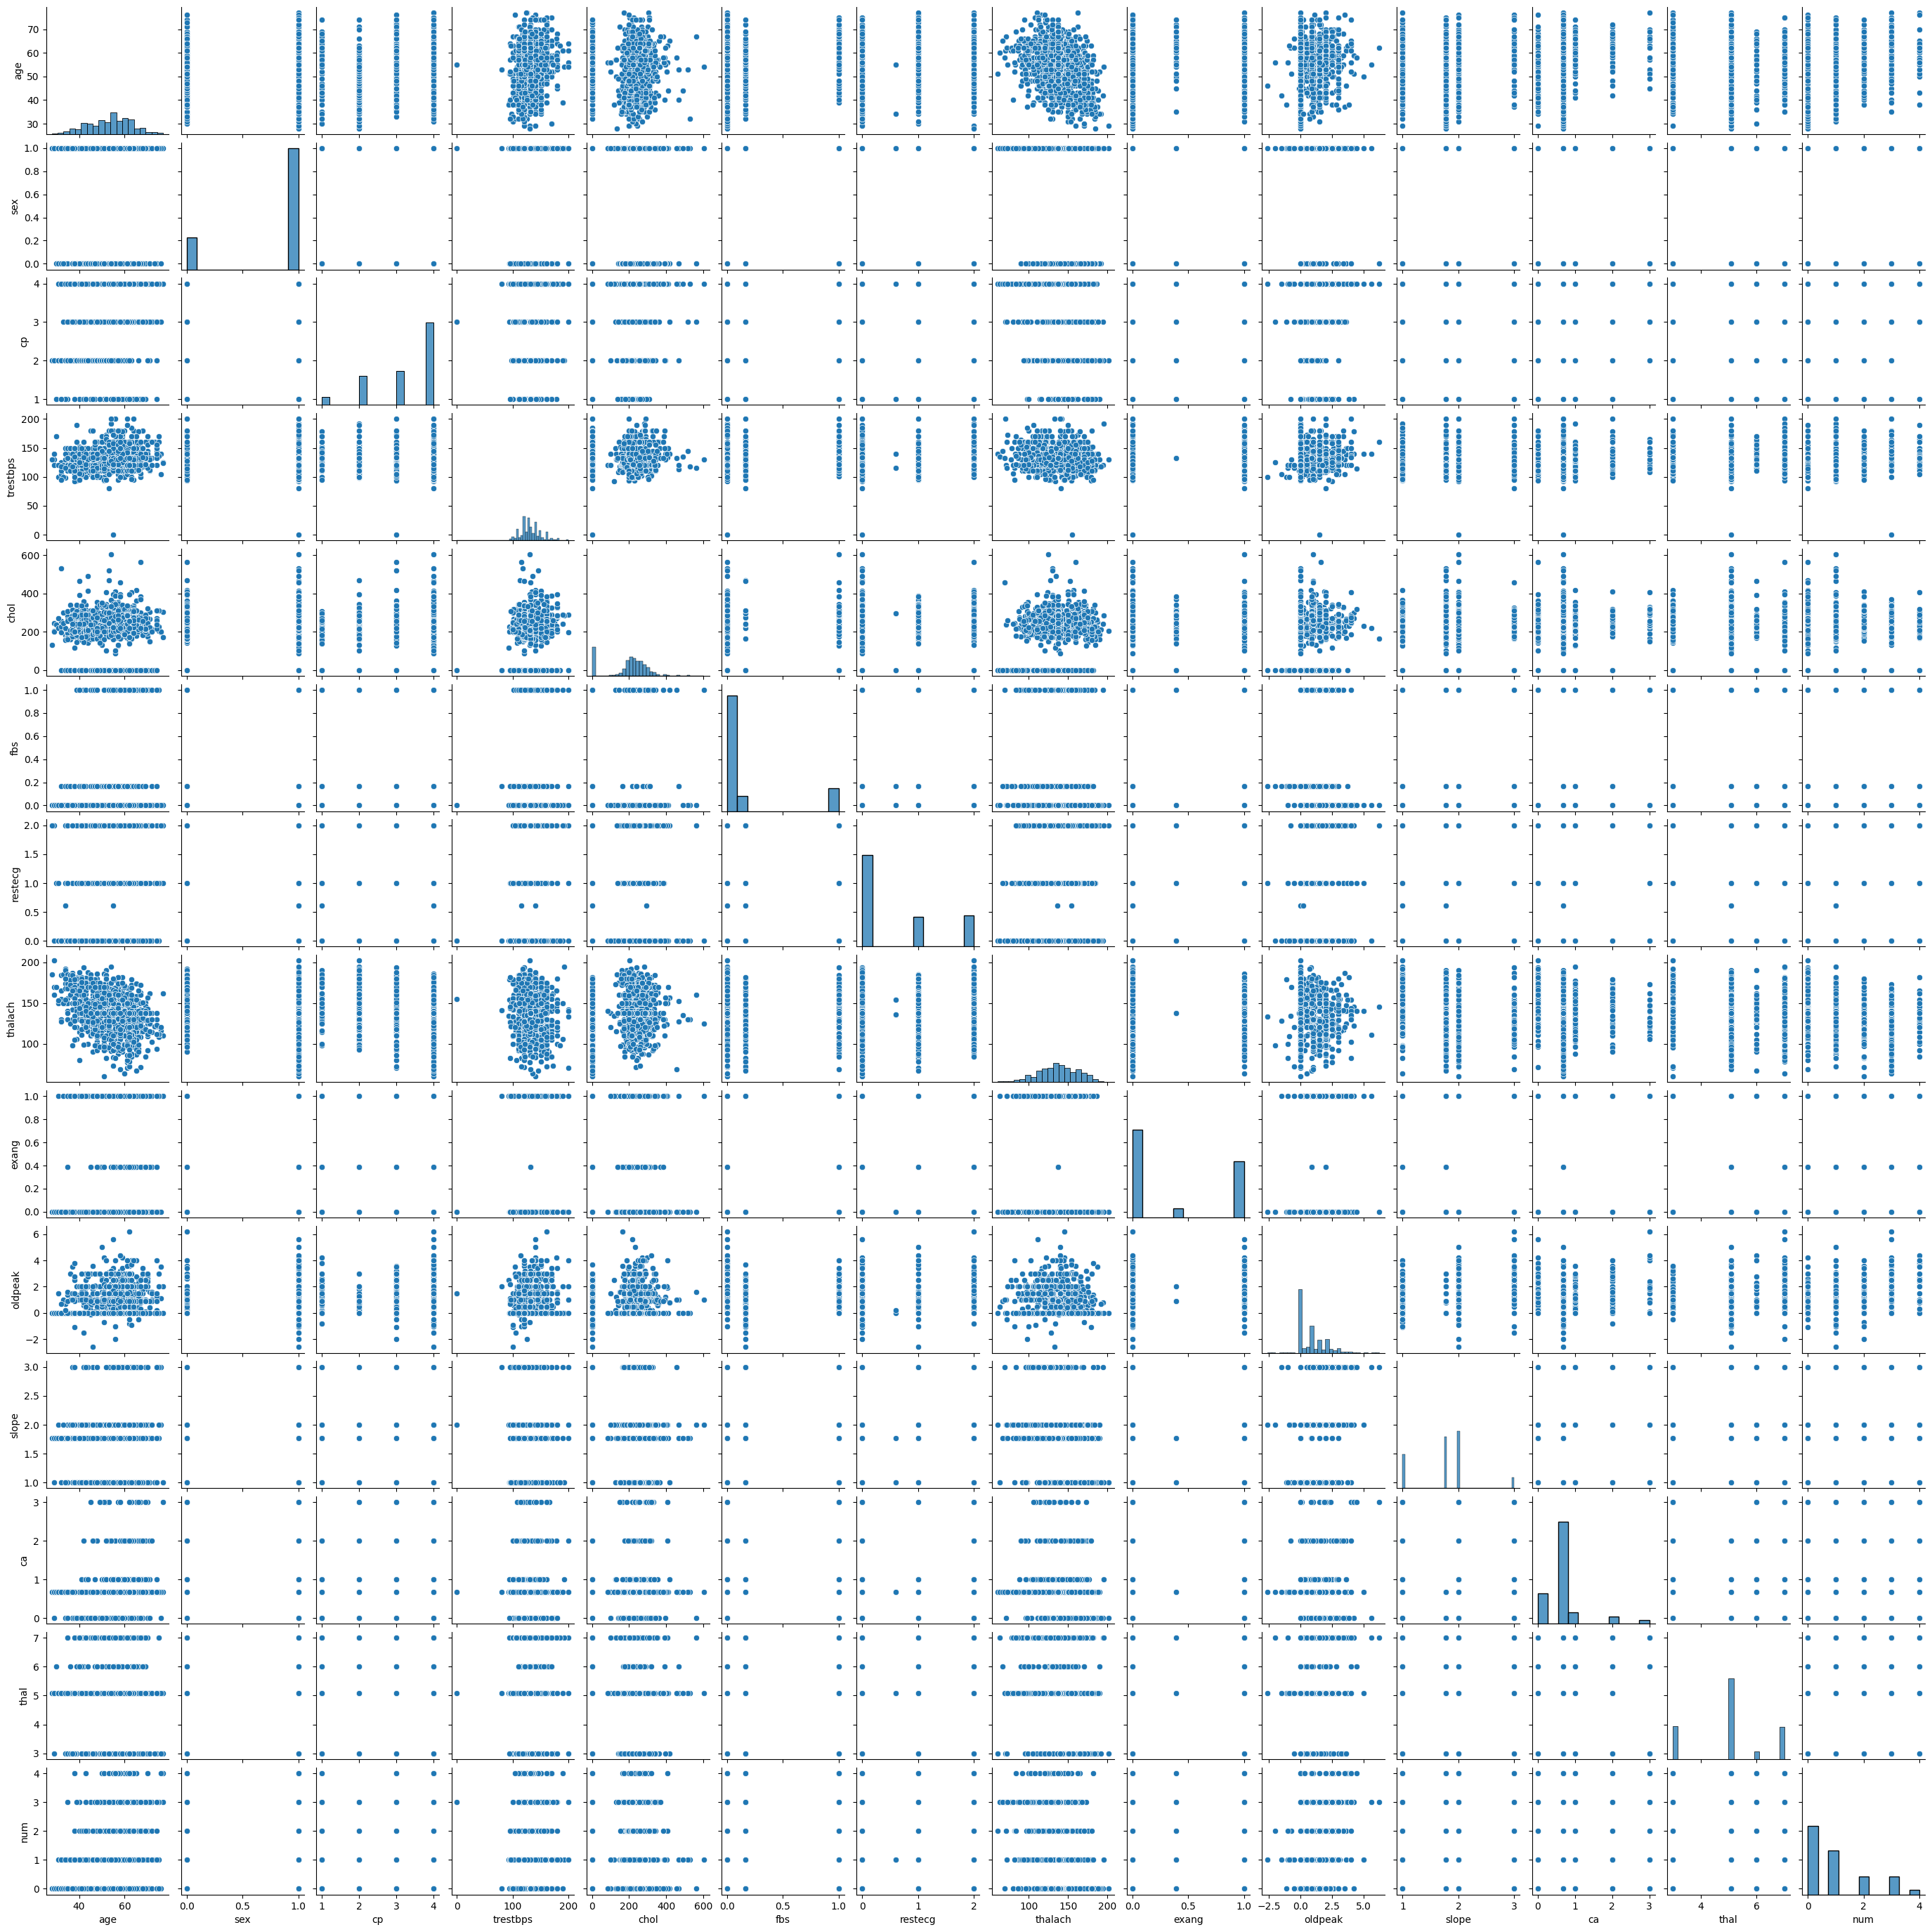

In [56]:
start_timer = tt.default_timer() 
df1 = pd.DataFrame(data=np_arr,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
sns.pairplot(df1, height=2)
print(tt.default_timer()-start_timer)